<a href="https://www.kaggle.com/code/vickodanendra/03-vickodanendrasetyoyuwono?scriptVersionId=107079969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1> Customer 360 Degree View Dataset </h1>

<h2>Assignment 3</h2>

<b>by Vicko Danendra Setyo Yuwono - DS03293</b>

# Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# Import Data

In [3]:
# Import Data
customers_df = pd.read_csv("../input/brazilian-ecommerce/olist_customers_dataset.csv")
geo_df = pd.read_csv("../input/brazilian-ecommerce/olist_geolocation_dataset.csv")
orderitem_df = pd.read_csv("../input/brazilian-ecommerce/olist_order_items_dataset.csv")
orderpay_df = pd.read_csv("../input/brazilian-ecommerce/olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv("../input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("../input/brazilian-ecommerce/olist_orders_dataset.csv")
products_df = pd.read_csv("../input/brazilian-ecommerce/olist_products_dataset.csv")
sellers_df = pd.read_csv("../input/brazilian-ecommerce/olist_sellers_dataset.csv")
categname_df = pd.read_csv("../input/brazilian-ecommerce/product_category_name_translation.csv")

## Deskripsi dan Penjelasan Dataset

**Attention**

- An order might have multiple items.
- Each item might be fulfilled by a distinct seller.
- All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

![](https://i.imgur.com/HRhd2Y0.png)

- customers_df (olist_customers_dataset) = Informasi tentang customer dan lokasinya. Untuk mengidentifikasi unique customer dan lokasi pengirimannya di tiap order. Kolom customer_id selalu unique tiap order, sedangkan customer_unique_id akan sama tiap customer yang repurchases. 

- geo_df (olist_geolocation_dataset) = Informasi tentang lokasi, zip code, dan lat/lng nya. Dapat digunakan untuk plot lokasi dan mencari jarak antara seller dan customer.

- orderitem_df (olist_order_items_dataset) = informasi tentang item yang dibeli dalam setiap order. Berisikan harga dan biaya pengiriman tiap produk. Juga seller id dan limit pengiriman. 

- orderpay_df (olist_order_payments_dataset) = Informasi tentang metode pembayaran tiap order. 

- orderreviews_df (olist_order_reviews_dataset) =  informasi tentang review oleh customer tiap order.

- orders_df (olist_orders_dataset) = informasi tentang status order. Juga merupakan inti dari seluruh dataset. 

- products_df (olist_products_dataset) = informasi tentang produk yang sudah terjual.

- sellers_df (olist_sellers_dataset) = informasi tentang seller.

- categname_df (product_category_name_translation) = translate kategori produk ke inggris. 

# Data Preparation & EDA

## Customer Table (customers_df)

- customer_id: key to the orders dataset. Each order has a unique customer_id.
- customer_unique_id: unique identifier of a customer.
- customer_zip_code_prefix: first five digits of customer zip code.
- customer_city: customer city name.
- customer_state: customer state.

In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# cek missing values
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
# finding some insights
print('Jumlah City: ', customers_df.customer_city.nunique())
print('Jumlah States: ', customers_df.customer_state.nunique())
print(str.format('Rata-rata City per State: {:.0f}', customers_df.groupby(by='customer_state').customer_city.value_counts().mean()))

Jumlah City:  4119
Jumlah States:  27
Rata-rata City per State: 23


**Buat grafik distribusi customer per state**

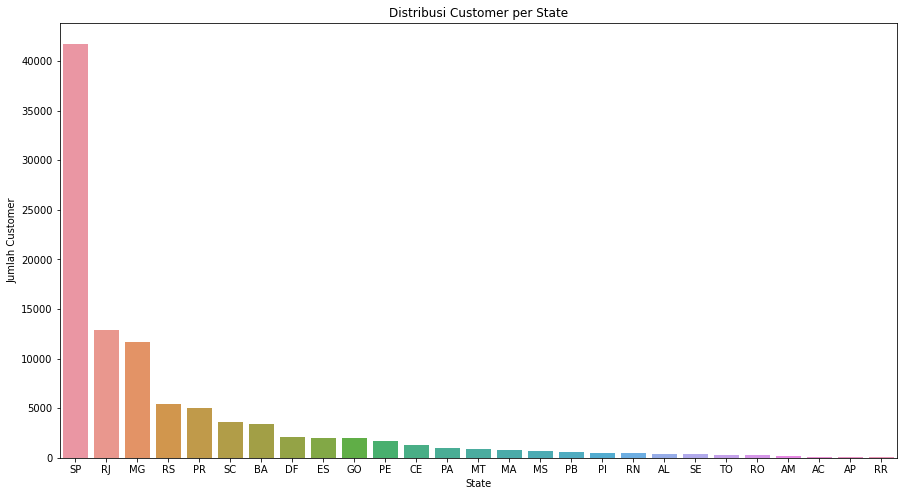

In [8]:
# plotting distribusi customer per state
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', 
              data=customers_df, 
              order = customers_df['customer_state'].value_counts().index)
plt.title('Distribusi Customer per State')
plt.xlabel('State')
plt.ylabel('Jumlah Customer')
plt.show()

Dari grafik di atas didapat 3 state yang mempunyai customer tertinggi yaitu SP, RJ, dan MG.

**Buat grafik distribusi TOP 5 order per state**

In [9]:
# Hitung jumlah order tiap state
state_order = customers_df.groupby('customer_state', as_index=False)['customer_id'].count()
state_order.columns=['state','jumlah_order']
state_order.sort_values('jumlah_order', ascending=False, inplace=True)
state_order.head()

,state,jumlah_order
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


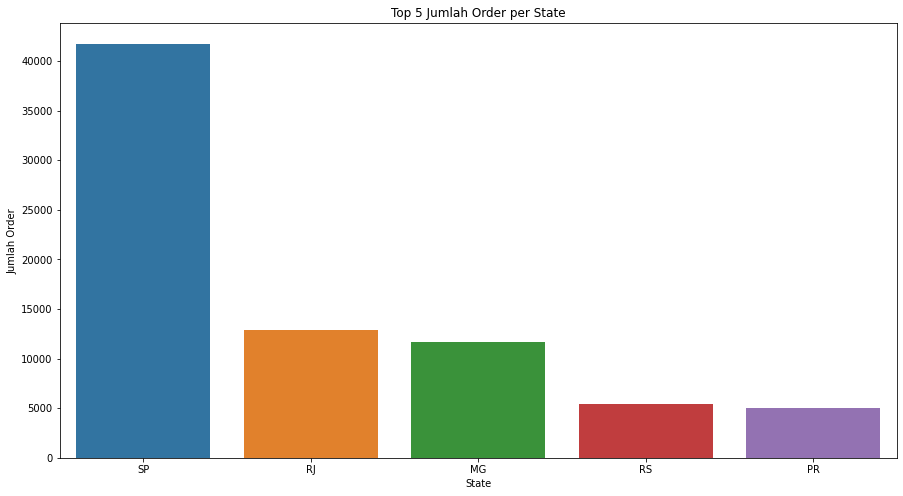

In [10]:
# Buat grafik distribusi jumlah order tiap state  
plt.figure(figsize=(15,8))
sns.barplot(x='state', y='jumlah_order', 
            data=state_order.head())
plt.title('Top 5 Jumlah Order per State')
plt.xlabel('State')
plt.ylabel('Jumlah Order')
plt.show()

## Geo Table (geo_df)

- geolocation_zip_code_prefix: first 5 digits of zip code.
- geolocation_lat: latitude
- geolocation_lng: longitude
- geolocation_city: city
- geolocation_state state

In [11]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
# cek missing values
geo_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Visualisasikan data point pada world map**

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


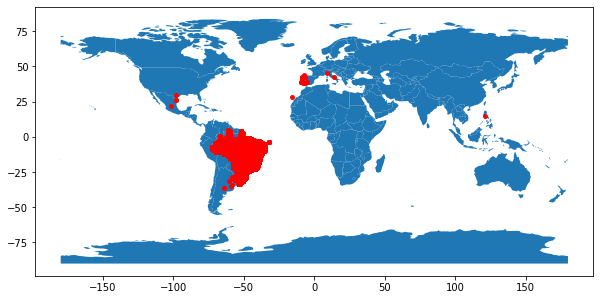

In [14]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(geo_df['geolocation_lng'], geo_df['geolocation_lat'])]
gdf = GeoDataFrame(geo_df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Dari plot di atas didapat bahwa kebanyakan order berasal dari negara Brazil. Namun, ada juga order dari negara Eropa, Amerika Utara, dan Asia.  

## Order Item Table (orderitem_df)

- order_id: order unique identifier.
- order_item_id: sequential number identifying number of items included in the same order.
- product_id: product unique identifier.
- seller_id: seller unique identifier.
- shipping_limit_date: shows the seller shipping limit date for handling the order over to the logistic partner.
- price: item price.
- freight_value: item freight value item (if an order has more than one item the freight value is splitted between items).

In [15]:
orderitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
orderitem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
# cek missing values
orderitem_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Buat grafik distribusi harga tiap order**

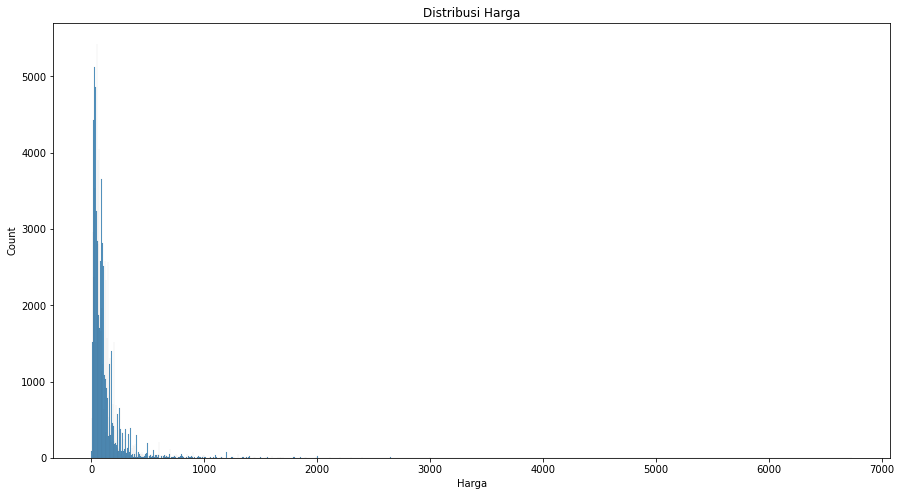

In [18]:
# plotting distribusi harga
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=orderitem_df)
plt.title('Distribusi Harga')
plt.xlabel('Harga')
plt.show()

Dari grafik distribusi di atas didapat bahwa kebanyakan harga di bawah 1000 Brazilian Reals. 

**Buat grafik distribusi biaya pengiriman**

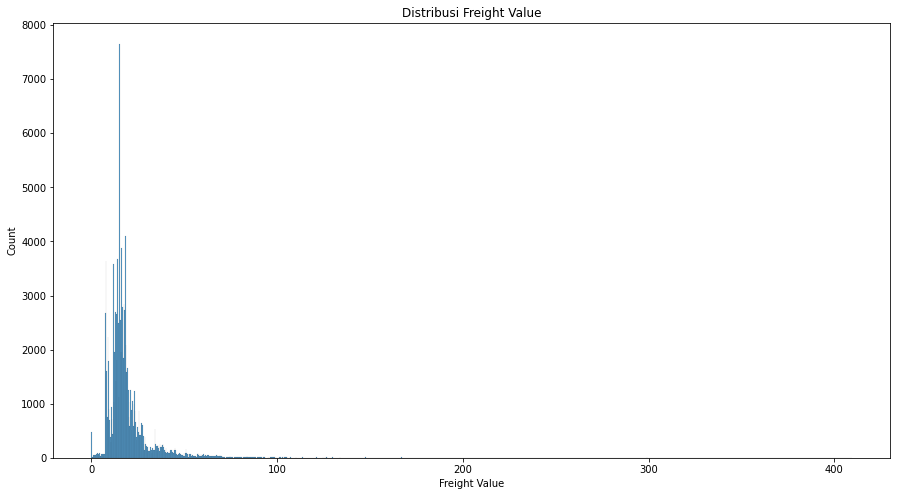

In [19]:
# plotting distribusi freight value
plt.figure(figsize=(15,8))
sns.histplot(x='freight_value', data=orderitem_df)
plt.title('Distribusi Freight Value')
plt.xlabel('Freight Value')
plt.show()

Dari grafik distribusi di atas didapat freight valuenya kebanyakan di bawah 100.

## Order Payment Table (orderpay_df)

- order_id: unique identifier of an order.
- payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created.
- payment_type: method of payment chosen by the customer.
- payment_installments: number of installments chosen by the customer.
- payment_value: transaction value.

In [20]:
orderpay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
orderpay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
# cek missing values
orderpay_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Buat grafik distribusi jenis pembayaran tiap order**

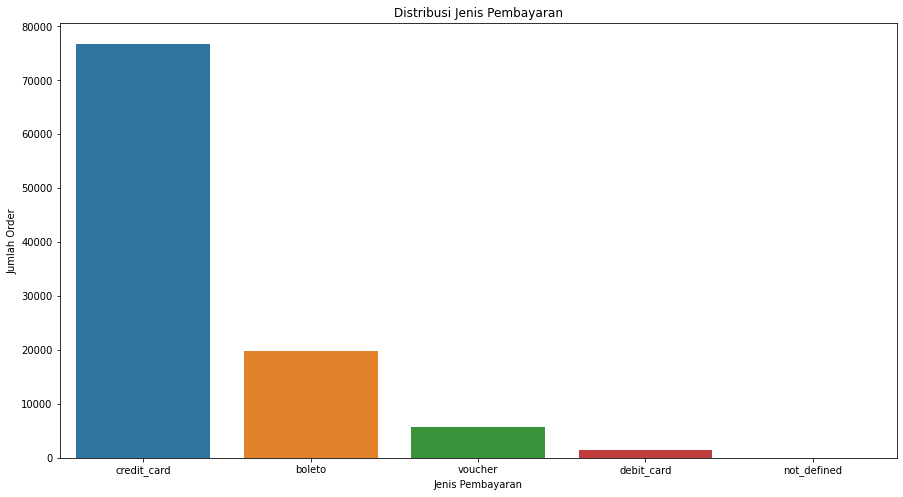

In [23]:
# grafik distribusi jenis pembayaran
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=orderpay_df)
plt.title('Distribusi Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Order')
plt.show()

Dari grafik distribusi di atas didapat bahwa jumlah customer terbanyak menggunakan jenis pembayaran credit card. Terdapat kategori not_defined yang dimisalkan sebagai missing value, maka kategori tersebut dapat dihapus. 

In [24]:
# hapus kategori pembayaran not_defined 
orderpay_df = orderpay_df.loc[orderpay_df['payment_type']!='not_defined', :]

In [25]:
orderpay_df['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

**Buat grafik distribusi banyaknya angsuran tiap order**

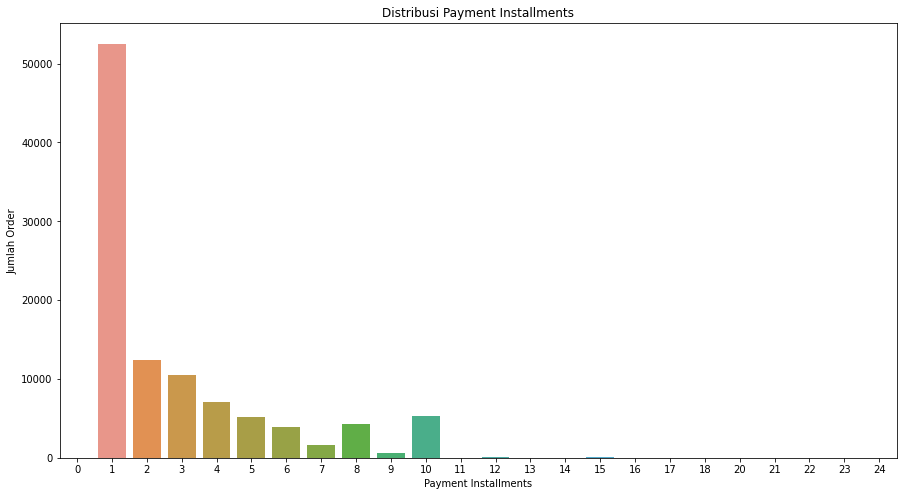

In [26]:
# plotting distribusi number of installments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=orderpay_df)
plt.title('Distribusi Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('Jumlah Order')
plt.show()

Dari grafik distribusi di atas didapat jika cicilan pembayaran paling banyak yaitu satu kali atau langsung bayar lunas.  

**Buat grafik distribusi nilai transaksi tiap order**

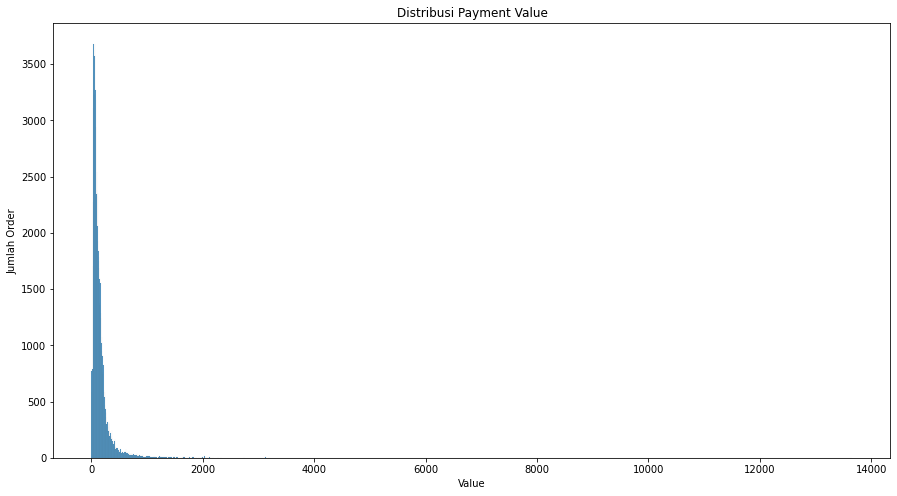

In [27]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=orderpay_df)
plt.title('Distribusi Payment Value')
plt.xlabel('Value')
plt.ylabel('Jumlah Order')
plt.show()

Dari grafik di atas didapat jika nilai transaksi kebanyakan berada di bawah nominal 1000.

## Order Review Table (orderreviews_df)

- review_id: unique review identifier.
- order_id: unique order identifier.
- review_score: note ranging from 1 to 5 given by the customer on a satisfaction survey.
- review_comment_title: comment title from the review left by the customer, in Portuguese.
- review_comment_message: comment message from the review left by the customer, in Portuguese.
- review_creation_date: shows the date in which the satisfaction survey was sent to the customer.
- review_answer_timestamp: shows satisfaction survey answer timestamp.

In [28]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [30]:
orderreviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat banyak nilai null pada kolom review_comment_title dan review_comment_message, tetapi kolom tersebut dibutuhkan untuk analisis sentimen atau untuk mengetahui produk apa saja yang sudah dikomen. Jadi kolom tersebut tidak dihapus. 

**Buat grafik distribusi nilai score**

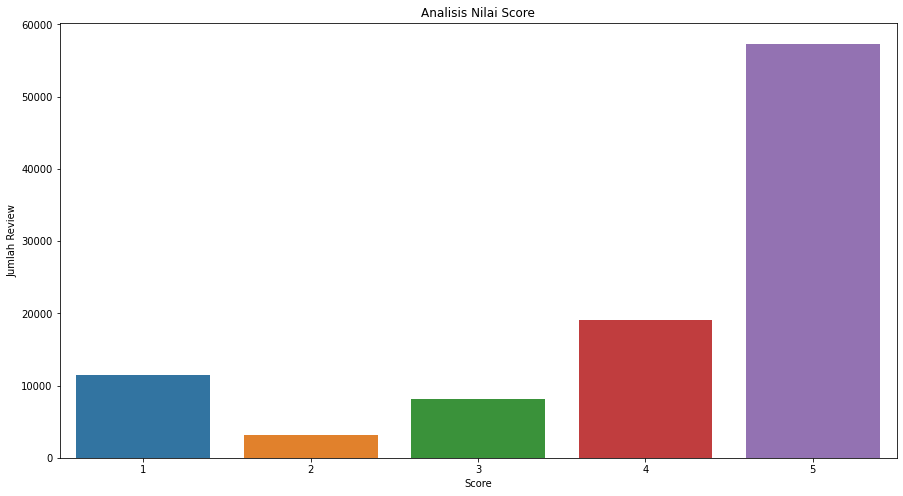

In [31]:
# grafik distribusi nilai score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=orderreviews_df)
plt.title('Analisis Nilai Score')
plt.xlabel('Score')
plt.ylabel('Jumlah Review')
plt.show()

Dari grafik review score di atas didapat jika score 5 memiliki jumlah yang paling banyak, diikuti dengan score 4. Namun, score 1 juga memiliki jumlah yang lumayan tinggi, itu berarti masih ada beberapa customer yang kurang puas dengan produk atau pelayanannya.

## Order Table (orders_df)

- order_id: unique identifier of the order.
- customer_id: key to the customer dataset. Each order has a unique customer_id.
- order_status: reference to the order status (delivered, shipped, etc).
- order_purchase_timestamp: shows the purchase timestamp.
- order_approved_at: shows the payment approval timestamp.
- order_delivered_carrier_date: shows the order posting timestamp. When it was handled to the logistic partner.
- order_delivered_customer_date: shows the actual order delivery date to the customer.
- order_estimated_delivery date: shows the estimated delivery date that was informed to customer at the purchase moment.

In [32]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [33]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [34]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Dari data di atas didapat bahwa sudah banyak orderan yang sudah sampai.

Karena masih ada nilai null, maka dapat didrop nilai null. 

In [36]:
orders_df = orders_df.dropna()

In [37]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Ubah kolom yang seharusnya memiliki tipe data date dari tipe data string.

In [38]:
# Ubah date kolom dari string
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for i in date_cols:
  orders_df[i] = pd.to_datetime(orders_df[i])
  
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


## Product Table (products_df)

- product_id: unique product identifier.
- product_category_head: root category of product, in Portuguese..
- product_name_length: number of characters extracted from the product name.
- product_description_lenght: number of characters extracted from the product description.
- product_photos_qty: number of product published photos.
- product_weight_g: product weight measured in grams.
- product_length_cm: product length measured in centimeters.
- product height_cm: product height measured in centimeters.
- product_width_cm: product width measured in centimeters.

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [41]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Buat grafik distribusi produk per kategori**

In [42]:
# Jumlah produk per kategori
kategori = products_df.groupby(by='product_category_name')['product_id'].nunique()
kategori = pd.DataFrame(kategori).sort_values('product_id', ascending=False)
kategori.head()

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335


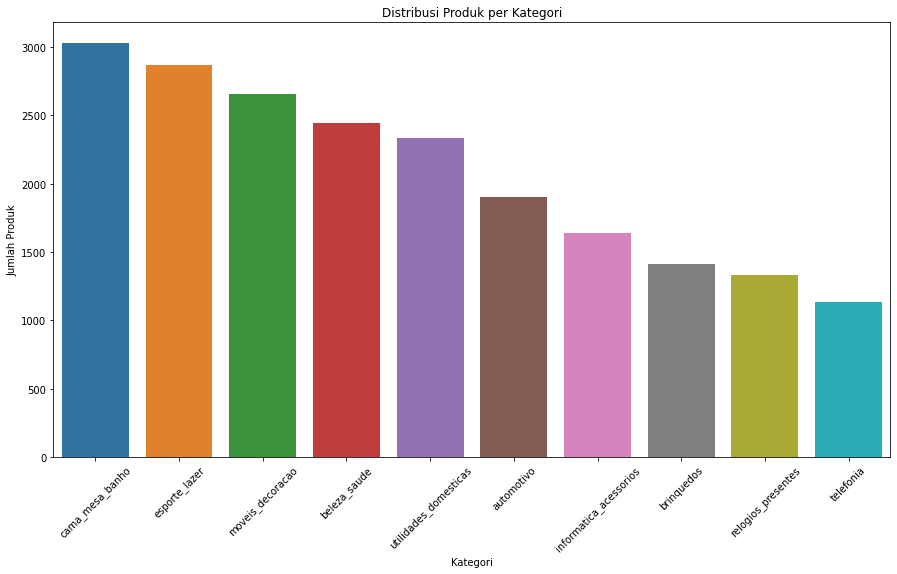

In [43]:
# plotting distribusi produk per kategori
plt.figure(figsize=(15,8))
sns.barplot(x='product_category_name',
            y='product_id',
            data=kategori.reset_index().head(10))
plt.title('Distribusi Produk per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation = 45)
plt.show()

Dari grafik distribusi di atas didapat top 10 kategori per produk.  

**Buat grafik distribusi panjang nama dan deskripsi product**

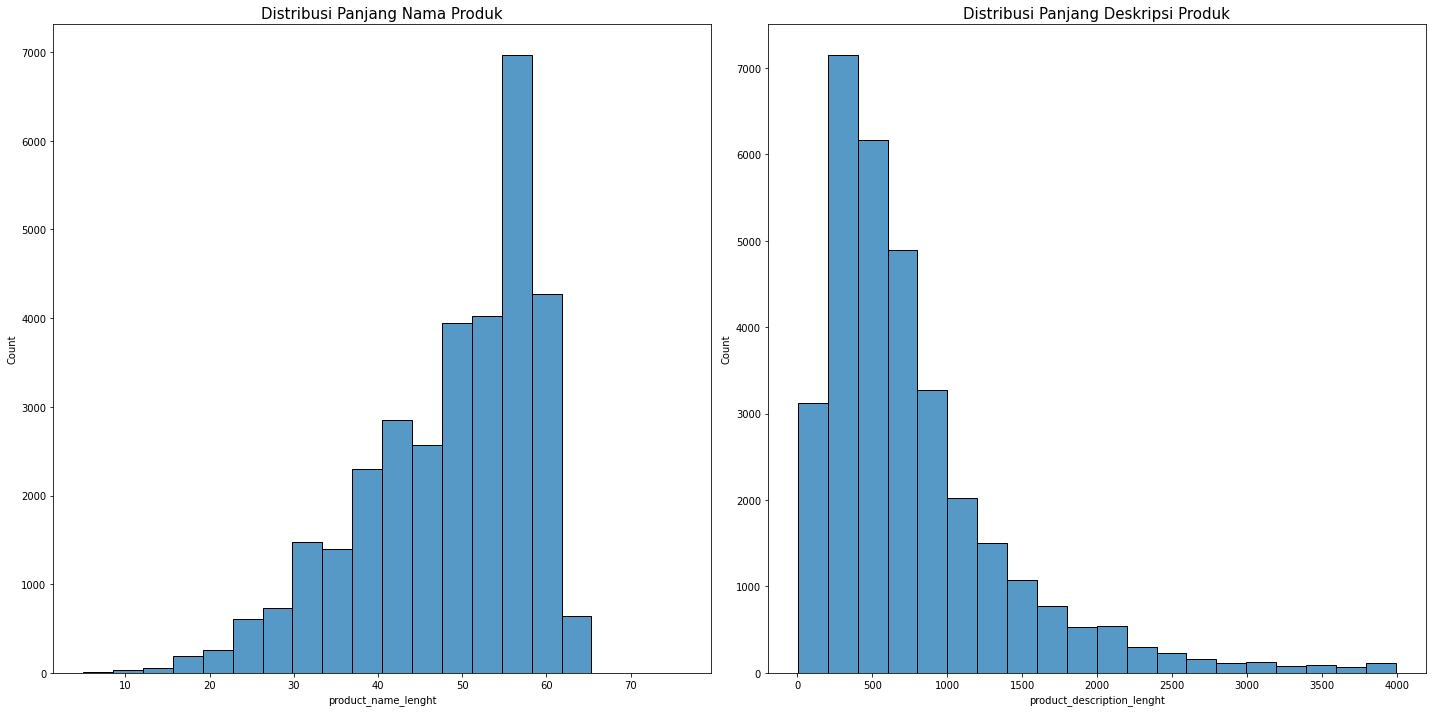

In [44]:
fig, ax= plt.subplots(ncols=2, figsize=(20,10))
sns.histplot(x='product_name_lenght', data=products_df, bins=20, ax=ax[0])
sns.histplot(x='product_description_lenght', data=products_df, bins=20, ax=ax[1])
ax[0].set_title('Distribusi Panjang Nama Produk', fontsize=15)
ax[1].set_title('Distribusi Panjang Deskripsi Produk', fontsize=15)
fig.tight_layout()

Dari grafik di atas didapat bahwa kebanyakan judul produk memiliki panjang karakter 40-60 dan deskripsi produk di bawah 1000. 

**Buat grafik distribusi banyak foto tiap produk**

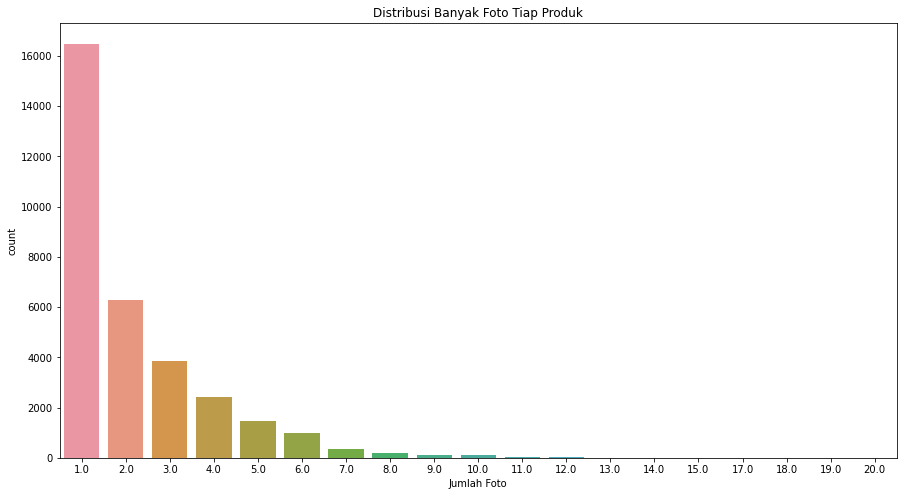

In [45]:
# plotting distribusi banyak foto
plt.figure(figsize=(15,8))
sns.countplot(x='product_photos_qty', data=products_df)
plt.title('Distribusi Banyak Foto Tiap Produk')
plt.xlabel('Jumlah Foto')
plt.show()

Dari grafik di atas kebanyakan tiap produk hanya memiliki satu foto.

## Seller Table (sellers_df)

- seller_id: seller unique identifier.
- seller_zip_code: first 5 digits of seller zip code.
- seller_city: seller city name.
- seller_state: seller state.

In [46]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [47]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [48]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Buat grafik distribusi jumlah seller per state**

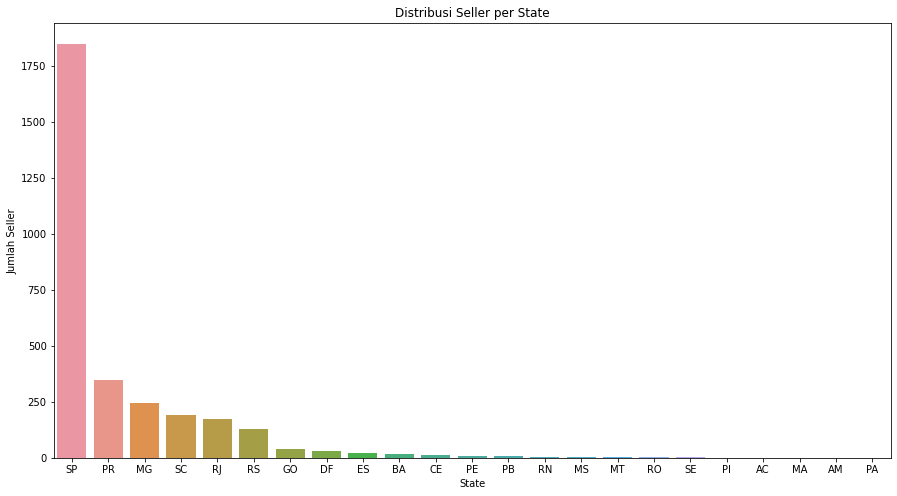

In [49]:
# plotting distribusi seller per state
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', 
              data=sellers_df,
              order = sellers_df['seller_state'].value_counts().index)
plt.title('Distribusi Seller per State')
plt.xlabel('State')
plt.ylabel('Jumlah Seller')
plt.show()

Dari grafik di atas didapat bahwa state SP memiliki jumlah seller paling banyak.  

## Product Category Name Table (categname_df)

- product_category_name: category name in Portuguese.
- product_name_english: category name in English.

In [50]:
categname_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [51]:
categname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [52]:
categname_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

**Penggabungan tabel produk dan kategori name**

In [53]:
products_english_df = products_df.merge(categname_df, left_on='product_category_name', right_on='product_category_name_english')
products_english_df = products_english_df.drop(columns=['product_category_name_x', 'product_category_name_y'])
products_english_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,732bd381ad09e530fe0a5f457d81becb,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
1,7a8dac4aaa16bc642e4df33adcf03303,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0,cool_stuff
2,5f504b3a1c75b73d6151be81eb05bdc9,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0,cool_stuff
3,b5cfb1d3c5e435a7a52227e08f220ee7,55.0,410.0,2.0,1300.0,36.0,16.0,24.0,cool_stuff
4,fdeb34a9f03fea7c3937dd62d1d0287e,58.0,1252.0,1.0,1100.0,30.0,20.0,23.0,cool_stuff


In [54]:
products_english_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2044
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     2045 non-null   object 
 1   product_name_lenght            2045 non-null   float64
 2   product_description_lenght     2045 non-null   float64
 3   product_photos_qty             2045 non-null   float64
 4   product_weight_g               2045 non-null   float64
 5   product_length_cm              2045 non-null   float64
 6   product_height_cm              2045 non-null   float64
 7   product_width_cm               2045 non-null   float64
 8   product_category_name_english  2045 non-null   object 
dtypes: float64(7), object(2)
memory usage: 159.8+ KB


# Customer 360

## Merge Data

In [55]:
df_full = orders_df.merge(customers_df, on = 'customer_id')
df_full = df_full.merge(orderpay_df, on = 'order_id')
df_full = df_full.merge(orderitem_df, on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [56]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 115017
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115018 non-null  object        
 1   customer_id                    115018 non-null  object        
 2   order_status                   115018 non-null  object        
 3   order_purchase_timestamp       115018 non-null  datetime64[ns]
 4   order_approved_at              115018 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115018 non-null  datetime64[ns]
 6   order_delivered_customer_date  115018 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115018 non-null  datetime64[ns]
 8   customer_unique_id             115018 non-null  object        
 9   customer_zip_code_prefix       115018 non-null  int64         
 10  customer_city                  115018 non-null  object        
 11  

## Customer yang melakukan pembelian kembali (Repurchase)

### Feature 1: repurchase 

In [57]:
customer_repurchase = customers_df[['customer_id','customer_unique_id']].groupby('customer_unique_id').count()
customer_repurchase.rename(columns={'customer_id':'repurchase'}, inplace=True)
customer_repurchase.head()

,repurchase
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


In [58]:
# Jumlah customer yang repurchase
print('Jumlah Customer yang Repurchase:', (customer_repurchase['repurchase']>1).sum())

Jumlah Customer yang Repurchase: 2997


In [59]:
# Jumlah customer keseluruhan
print('Jumlah Customer:', customers_df['customer_unique_id'].nunique())

Jumlah Customer: 96096


In [60]:
# Persentase customer yang melakukan repurchase
print('Persentase customer yang melakukan repurchase:', (customer_repurchase['repurchase']>1).sum() / customers_df['customer_unique_id'].nunique() * 100, '%')

Persentase customer yang melakukan repurchase: 3.1187562437562435 %


In [61]:
# Menghitung jumlah repurchase
customer_repurchase_count = customer_repurchase.value_counts().to_frame().reset_index()
customer_repurchase_count.columns= ['num of repurchase','jumlah']
customer_repurchase_count.sort_values('num of repurchase')

,num of repurchase,jumlah
0,1,93099
1,2,2745
2,3,203
3,4,30
4,5,8
5,6,6
6,7,3
7,9,1
8,17,1


Observations:

1. Persentase customer yang melakukan repurchase hanya 3.12%
2. Kebanyakan customer hanya melakukan pembelian satu kali (sekitar 96%)

In [62]:
customer_repurchase.reset_index(inplace=True)

In [63]:
df_full = df_full.merge(customer_repurchase, on = 'customer_unique_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1


In [64]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 115017
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115018 non-null  object        
 1   customer_id                    115018 non-null  object        
 2   order_status                   115018 non-null  object        
 3   order_purchase_timestamp       115018 non-null  datetime64[ns]
 4   order_approved_at              115018 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115018 non-null  datetime64[ns]
 6   order_delivered_customer_date  115018 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115018 non-null  datetime64[ns]
 8   customer_unique_id             115018 non-null  object        
 9   customer_zip_code_prefix       115018 non-null  int64         
 10  customer_city                  115018 non-null  object        
 11  

##  Berapa hari sejak pembelian terakhir oleh customer (Recency)



### Feature 2: recency 

In [65]:
recency_df = df_full.groupby('customer_unique_id')['order_approved_at'].max().reset_index()
recency_df = recency_df.rename({'order_approved_at':'most_recent'},axis = 1)
recency_df.head()

,customer_unique_id,most_recent
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52


In [66]:
recency_df['recency'] = (recency_df['most_recent'].max() - recency_df['most_recent']).dt.days
recency_df.head()

,customer_unique_id,most_recent,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,113
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,320
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,287


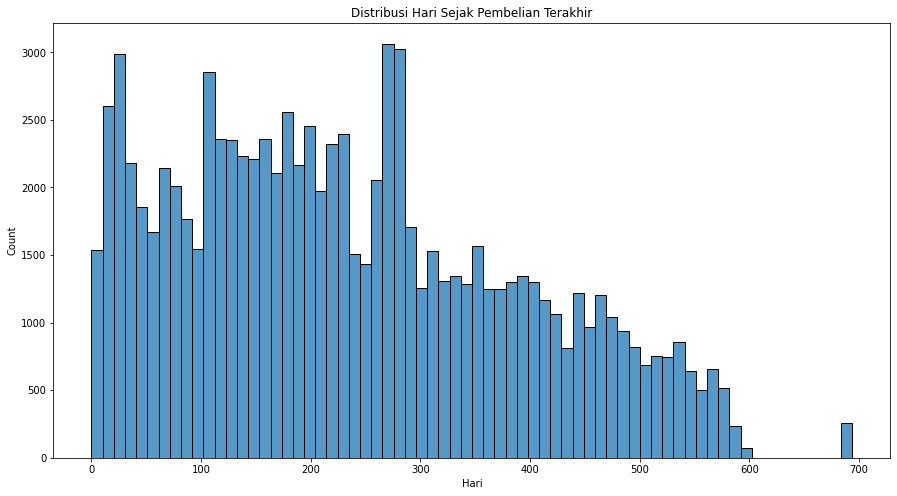

In [67]:
# plotting distribusi hari sejak pembelian terakhir
plt.figure(figsize=(15,8))
sns.histplot(x='recency', data=recency_df)
plt.title('Distribusi Hari Sejak Pembelian Terakhir')
plt.xlabel('Hari')
plt.show()

Observations:

1. Rentang hari sejak pembelian terakhir oleh customer adalah sampai 700 hari.
2. Paling banyak hari sejak pembelian terakhir oleh customer adalah di bawah 300 hari.

In [68]:
df_full = df_full.merge(recency_df, on = 'customer_unique_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34


In [69]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 115017
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115018 non-null  object        
 1   customer_id                    115018 non-null  object        
 2   order_status                   115018 non-null  object        
 3   order_purchase_timestamp       115018 non-null  datetime64[ns]
 4   order_approved_at              115018 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115018 non-null  datetime64[ns]
 6   order_delivered_customer_date  115018 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115018 non-null  datetime64[ns]
 8   customer_unique_id             115018 non-null  object        
 9   customer_zip_code_prefix       115018 non-null  int64         
 10  customer_city                  115018 non-null  object        
 11  

## Apakah Customer Churn?

### Feature 3: is_churn 

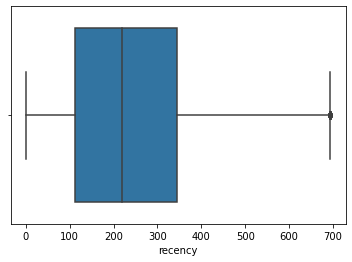

In [70]:
# Cari deksriptif analysis dengan boxplot 
sns.boxplot(x=df_full['recency'])
plt.show()

Dimisalkan jika customer akan churn jika pembelian terakhir lebih dari 500 hari

In [71]:
df_full['is_churn'] = df_full['recency'].apply(lambda x: True if x >= 500 else False)
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331,False
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34,False


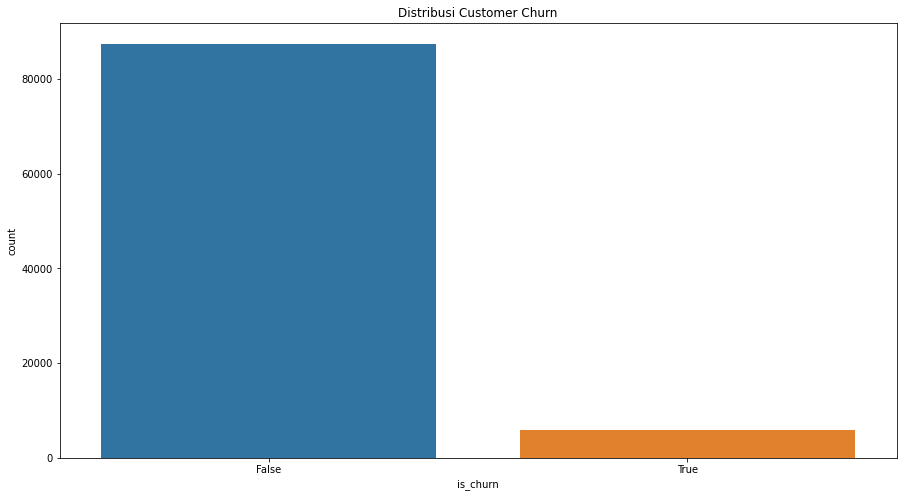

In [72]:
churn_customer = df_full.drop_duplicates(subset='customer_unique_id').reset_index()

# plotting distribusi customer churn
plt.figure(figsize=(15,8))
sns.countplot(x='is_churn', data=churn_customer)
plt.title('Distribusi Customer Churn')
plt.show()

Observations:

1. Kemungkinan jumlah customer churn berada di bawah 25000 

## Jumlah pembelian tiap customer (Total Purchase)

### Feature 4: total_purchase

In [73]:
total_purchase = df_full.groupby('customer_unique_id')['payment_value'].sum().reset_index()
total_purchase = total_purchase.rename({'payment_value':'total_purchase'},axis = 1)
total_purchase.head()

,customer_unique_id,total_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [74]:
df_full = df_full.merge(total_purchase, on = 'customer_unique_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331,False,82.82
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34,False,141.46


## Nilai pembelian rata-rata tiap customer (Average Purchase) 

### Feature 5: avg_purchase

In [75]:
avg_purchase = df_full.groupby('customer_unique_id')['payment_value'].mean().reset_index()
avg_purchase = avg_purchase.rename({'payment_value':'avg_purchase'},axis = 1)
avg_purchase.head()

,customer_unique_id,avg_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [76]:
df_full = df_full.merge(avg_purchase, on = 'customer_unique_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34,False,141.46,141.460


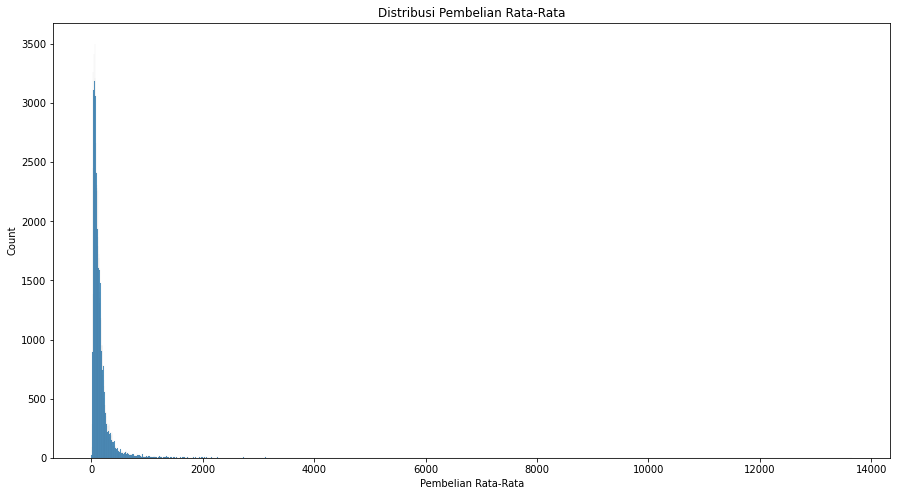

In [77]:
# plotting distribusi pembelian rata-rata
plt.figure(figsize=(15,8))
sns.histplot(x='avg_purchase', data=avg_purchase)
plt.title('Distribusi Pembelian Rata-Rata')
plt.xlabel('Pembelian Rata-Rata')
plt.show()

Observations:

1. Rentang pembelian rata-rata customer adalah di bawah 14000.
2. Paling banyak pembelian rata-rata customer adalah di bawah 2000.

## Member Customer (dari total purchase)

### Feature 6: member

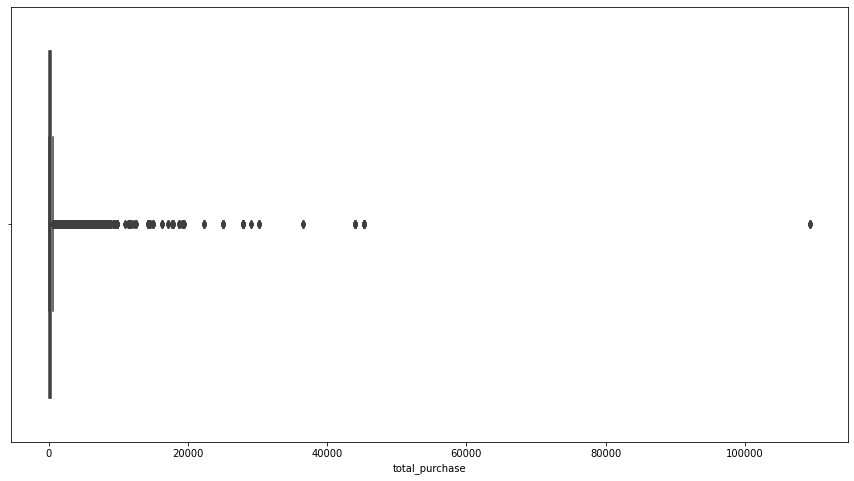

In [78]:
# Cari deksriptif analysis dengan boxplot 
plt.figure(figsize=(15,8))
sns.boxplot(x=df_full['total_purchase'])
plt.show()

Dimisalkan jika member customer:

1. Silver = Total purchase di bawah 1.000
2. Gold = Total purchase di bawah 5.000
3. Platinum = Total purchase di bawah 25.000
4. Diamond = Total purchase di atas 25.000

In [79]:
def member(x):
    if x <= 1000:
        return 'Silver'
    elif x <= 5000:
        return 'Gold'
    elif x <= 25000:
        return 'Platinum'
    else:
        return 'Diamond'
    
df_full['member'] = df_full['total_purchase'].apply(lambda x: member(x))
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34,False,141.46,141.460,Silver


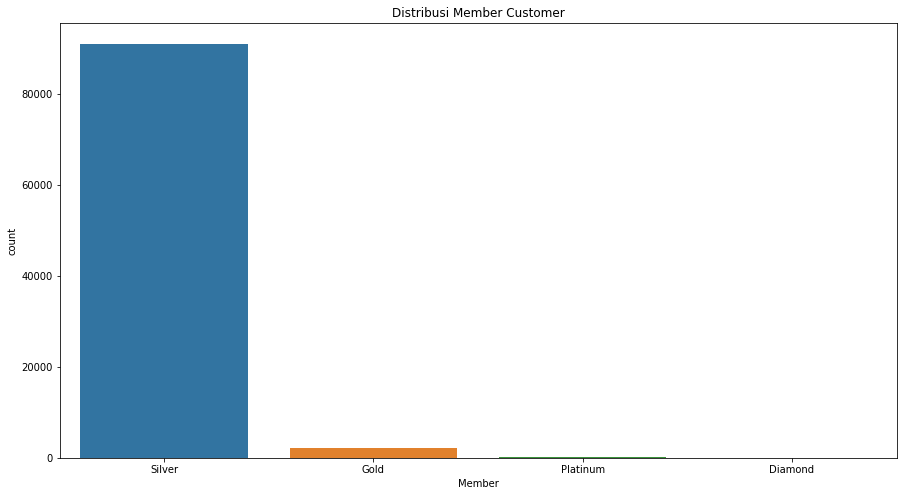

In [80]:
member_customer = df_full.drop_duplicates(subset='customer_unique_id').reset_index()

# plotting distribusi Member Customer
plt.figure(figsize=(15,8))
sns.countplot(x='member', data=member_customer)
plt.title('Distribusi Member Customer')
plt.xlabel('Member')
plt.show()

## Pengelompokan Review Score Product Oleh Customer 

### Feature 7: review_score_class

In [81]:
def score_group(x):
    if x>= 4:
        return 'Positive'
    elif 2<=x<=1:
        return 'Negative'
    else:
        return 'Netral'

orderreviews_df['review_score_class'] = orderreviews_df['review_score'].apply(lambda x: score_group(x))
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,Positive
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,Positive
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,Positive
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Positive
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Positive


In [82]:
df_full = df_full.merge(orderreviews_df, on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,493e9a0b23de35d37871a6e8940f822a,5,NaN,O produto está ok e foi entregue bem antes do ...,2017-09-06 00:00:00,2017-09-07 00:44:35,Positive
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34,False,141.46,141.460,Silver,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,Positive


In [83]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114842 entries, 0 to 114841
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114842 non-null  datetime64[ns]
 6   order_delivered_customer_date  114842 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   customer_unique_id             114842 non-null  object        
 9   customer_zip_code_prefix       114842 non-null  int64         
 10  customer_city                  114842 non-null  object        
 11  

## Lamanya Pengiriman Tiap Order dan Estimasinya Oleh Customer

### Feature 8: delivery_time

In [84]:
# Delivery Time
orders_df['delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23


### Feature 9: estimated_delivery_time

In [85]:
# Estimasi Delivery Time
orders_df['estimated_delivery_time'] = orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,15 days 13:03:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,19 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,26 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,26 days 04:31:54
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,12 days 02:41:21


### Feature 10: diff_delivery_time 

In [86]:
# Perbedaan Delivery Time dengan Estimated Delivery Time
orders_df['diff_delivery_time'] = orders_df['estimated_delivery_time'] - orders_df['delivery_time']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,diff_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58


### Feature 11: to_logistic_time

In [87]:
# Waktu sampai ke logistik pengiriman
orders_df['to_logistic_time'] = orders_df['order_delivered_carrier_date'] - orders_df['order_purchase_timestamp']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,1 days 17:49:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,0 days 05:11:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,3 days 18:11:53
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,0 days 22:27:55


### Feature 12: category_delivery

In [88]:
# Category Pengiriman
def category_delivery(x):
    if x == 0:
        return 'On Time'
    elif x < 0:
        return 'Late'
    else:
        return 'Fast'

orders_df['category_delivery'] = orders_df['diff_delivery_time'].dt.days.apply(lambda x: category_delivery(x))
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,1 days 17:49:23,Fast
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,0 days 05:11:11,Fast
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,3 days 18:11:53,Fast
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,0 days 22:27:55,Fast


In [89]:
df_full = df_full.merge(orders_df[['order_id', 'delivery_time', 'estimated_delivery_time', 'diff_delivery_time', 'to_logistic_time', 'category_delivery']], on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast
3,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,493e9a0b23de35d37871a6e8940f822a,5,NaN,O produto está ok e foi entregue bem antes do ...,2017-09-06 00:00:00,2017-09-07 00:44:35,Positive,1 days 07:53:42,10 days 12:33:22,9 days 04:39:40,0 days 09:55:37,Fast
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34,False,141.46,141.460,Silver,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,Positive,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,1 days 17:49:23,Fast


## Apakah Customer Membayar Produk dengan Mencicil?

### Feature 13: is_credit

In [90]:
def credit(x):
    if x == 1:
        return False
    else:
        return True
    
orderpay_df['is_credit'] = orderpay_df['payment_installments'].apply(lambda x: credit(x))
orderpay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,is_credit
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,True
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,False
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,False
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,True
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,True


In [91]:
df_full = df_full.merge(orderpay_df[['order_id', 'is_credit']], on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery,is_credit
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False


In [92]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135700 entries, 0 to 135699
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       135700 non-null  object         
 1   customer_id                    135700 non-null  object         
 2   order_status                   135700 non-null  object         
 3   order_purchase_timestamp       135700 non-null  datetime64[ns] 
 4   order_approved_at              135700 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   135700 non-null  datetime64[ns] 
 6   order_delivered_customer_date  135700 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  135700 non-null  datetime64[ns] 
 8   customer_unique_id             135700 non-null  object         
 9   customer_zip_code_prefix       135700 non-null  int64          
 10  customer_city                  135700 non-null  object  

## Jumlah Review Comment Message Pada Tiap Produk Oleh Customer

### Feature 14: num_review_comment

In [93]:
# Jumlah review comment message tiap produk oleh customer
orderreviews_df['num_review_comment']= orderreviews_df['review_comment_message'].notna().astype(int)
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,num_review_comment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,Positive,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,Positive,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,Positive,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Positive,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Positive,1


In [94]:
df_full = df_full.merge(orderreviews_df[['order_id', 'num_review_comment']], on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery,is_credit,num_review_comment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1


In [95]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137602 entries, 0 to 137601
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       137602 non-null  object         
 1   customer_id                    137602 non-null  object         
 2   order_status                   137602 non-null  object         
 3   order_purchase_timestamp       137602 non-null  datetime64[ns] 
 4   order_approved_at              137602 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   137602 non-null  datetime64[ns] 
 6   order_delivered_customer_date  137602 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  137602 non-null  datetime64[ns] 
 8   customer_unique_id             137602 non-null  object         
 9   customer_zip_code_prefix       137602 non-null  int64          
 10  customer_city                  137602 non-null  object  

## Jarak Waktu Customer Mengisi Survei Sejak Dikirimnya Link Survei

In [96]:
# Ubah date kolom dari string
date_cols = ['review_creation_date', 'review_answer_timestamp']

for i in date_cols:
  orderreviews_df[i] = pd.to_datetime(orderreviews_df[i])

### Feature 15: review_answer_time

In [97]:
# Waktu yang dibutuhkan customer dalam menjawab review creation 
orderreviews_df['review_answer_time'] = orderreviews_df['review_answer_timestamp'] - orderreviews_df['review_creation_date']
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,num_review_comment,review_answer_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,Positive,0,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,Positive,0,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,Positive,0,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,Positive,1,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,Positive,1,1 days 10:26:53


### Feature 16: respons_review_time

In [98]:
# Respons review oleh customer
def respons_review(x):
    if x == 0:
        return 'On Time'
    elif x < 7:
        return 'Fast'
    else:
        return 'Late'

orderreviews_df['respons_review_time'] = orderreviews_df['review_answer_time'].dt.days.apply(lambda x: respons_review(x))
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,num_review_comment,review_answer_time,respons_review_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,Positive,0,0 days 21:46:59,On Time
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,Positive,0,1 days 03:05:13,Fast
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,Positive,0,1 days 14:36:24,Fast
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,Positive,1,0 days 22:02:06,On Time
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,Positive,1,1 days 10:26:53,Fast


In [99]:
df_full = df_full.merge(orderreviews_df[['order_id', 'review_answer_time', 'respons_review_time']], on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery,is_credit,num_review_comment,review_answer_time,respons_review_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast


## Total Price, Freight Value, dan Total Order Value Tiap Produk

### Feature 17: total_order

In [100]:
# Total order tiap customer 
total_order = orderitem_df[['order_id', 'order_item_id']].groupby('order_id').max().reset_index()
total_order.rename(columns={'order_item_id':'total_order'}, inplace=True)
total_order.head()

,order_id,total_order
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [101]:
orderitem_df = orderitem_df.merge(total_order, on = 'order_id')
orderitem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


### Feature 18: total_price 

### Feature 19: total_freight_value 

### Feature 20: total_order_value 

In [102]:
# Total Price
orderitem_df['total_price'] = orderitem_df['total_order'] * orderitem_df['price']

# Total Freight Value
orderitem_df['total_freight_value'] = orderitem_df['total_order'] * orderitem_df['freight_value']

# Total Order Value
orderitem_df['total_order_value'] = orderitem_df['total_price'] + orderitem_df['total_freight_value']

orderitem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order,total_price,total_freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,199.90,18.14,218.04


In [103]:
df_full = df_full.merge(orderitem_df[['order_id', 'total_order', 'total_price', 'total_freight_value', 'total_order_value']], on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery,is_credit,num_review_comment,review_answer_time,respons_review_time,total_order,total_price,total_freight_value,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:2

## Main Payment Type Customer

### Feature 21: main_payment_type 

In [104]:
# Main payment tiap customer
main_payment = df_full[['customer_unique_id', 'payment_type']].groupby('customer_unique_id').agg(pd.Series.mode).reset_index()
main_payment.rename(columns={'payment_type':'main_payment_type'}, inplace=True)
main_payment.head()

,customer_unique_id,main_payment_type
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card
2,0000f46a3911fa3c0805444483337064,credit_card
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card
4,0004aac84e0df4da2b147fca70cf8255,credit_card


In [105]:
df_full = df_full.merge(main_payment, on = 'customer_unique_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery,is_credit,num_review_comment,review_answer_time,respons_review_time,total_order,total_price,total_freight_value,total_order_value,main_payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71,voucher
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71,voucher
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71,voucher
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71,voucher
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:

## Dataset Final (df_full)

In [106]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196738 entries, 0 to 196737
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       196738 non-null  object         
 1   customer_id                    196738 non-null  object         
 2   order_status                   196738 non-null  object         
 3   order_purchase_timestamp       196738 non-null  datetime64[ns] 
 4   order_approved_at              196738 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   196738 non-null  datetime64[ns] 
 6   order_delivered_customer_date  196738 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  196738 non-null  datetime64[ns] 
 8   customer_unique_id             196738 non-null  object         
 9   customer_zip_code_prefix       196738 non-null  int64          
 10  customer_city                  196738 non-null  object  

In [107]:
df_full.drop_duplicates(subset='order_id', inplace=True)
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,repurchase,most_recent,recency,is_churn,total_purchase,avg_purchase,member,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_class,delivery_time,estimated_delivery_time,diff_delivery_time,to_logistic_time,category_delivery,is_credit,num_review_comment,review_answer_time,respons_review_time,total_order,total_price,total_freight_value,total_order_value,main_payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,Positive,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,2 days 08:58:27,Fast,False,1,1 days 03:43:48,Fast,1,29.99,8.72,38.71,voucher
9,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,2,2017-10-02 11:07:15,331,False,82.82,20.705,Silver,493e9a0b23de35d37871a6e8940f822a,5,NaN,O produto está ok e foi entregue bem antes do ...,2017-09-06 00:00:00,2017-09-07 00:44:35,Positive,1 days 07:53:42,10 days 12:33:22,9 days 04:39:40,0 days 09:55:37,Fast,False,1,1 days 00:44:35,Fast,1,35.39,8.72,44.11,voucher
10,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,2018-07-26 03:24:27,34,False,141.46,141.460,Silver,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,Positive,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,1 days 17:49:23,Fast,False,1,0 days 18:37:50,On Time,1,118.70,22.76,141.46,boleto
11,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,2018-08-08 08:55:23,21,False,179.12,179.120,Silver,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,Positive,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,0 days 05:11:11,Fast,True,0,4 days 19:07:58,Fast,1,159.90,19.22,179.12,credit_card
12,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,credit_card,1,72.20,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1,2017-11-18 19:45:59,283,False,72.20,72.200,Silver,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,Positive,13 days 05:00:36,26 days 04:31:54,1

In [108]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95814 entries, 0 to 196737
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       95814 non-null  object         
 1   customer_id                    95814 non-null  object         
 2   order_status                   95814 non-null  object         
 3   order_purchase_timestamp       95814 non-null  datetime64[ns] 
 4   order_approved_at              95814 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   95814 non-null  datetime64[ns] 
 6   order_delivered_customer_date  95814 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  95814 non-null  datetime64[ns] 
 8   customer_unique_id             95814 non-null  object         
 9   customer_zip_code_prefix       95814 non-null  int64          
 10  customer_city                  95814 non-null  object         
 11  c

**Export Data**

In [109]:
df_full.to_csv('customer360.csv')

In [110]:
df_full.to_excel('customer360.xlsx')